# CSCI4022 Homework 3; Clustering

## Due Monday, February 22 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 1 (Theory: GMM; 5 pts) 
In the GMM slides, we stated that the weights $w_m$ of the 1-dimensional GMM with pdf

$f(x|\theta)=w_1\phi(x|\mu_1, \sigma_1^2)+w_2\phi(x|\mu_2, \sigma_2^2)+\dots+ w_m\phi(x|\mu_m, \sigma_m^2)$

required the weights to sum to one.  

#### a) Use the following markdown cell to prove this statement.  In a sentence, describe how this proof might change in higher dimensions.

 A PDF gives probability of data values given parameter values,and a GMM wants the opposite. To get to the form above we use bayes' theorem: $P(\theta | x) = \frac{f(x | \theta) g(\theta)}{h(x)} $, where $g(\theta)$ would be discarded since we assume no probability assumption on parameters of $\theta$ and since GMM is a maximization function we would ignore the denominator. 
 
 $f(x | \theta)$ is the likelihood of x falling into a range x values represented as m-Guasssian's $\phi(x|\mu_m, \sigma_m^2)$.  We utilize the Law of total probability to combine all pdf's onto one continous curve. Since each gaussian uses this we know that each $w_m = \frac{n_m}{N} = \frac{\texttt{# of data point in cluster m}}{\texttt{Total number of data points}}$. Thus the sum of every weight $w_i$ must add to one by definition.
 
 The proof might change in higher dimensions, for each higher dimension the numerator needs to account for cluster m from each dimension $d_i$. And the numerator would also need account for the new total amount of points. Below is an example with two dimension: 
 $w_m = \frac{\texttt{# of data point in cluster m by X value + # of data point in cluster m by Y value}}{\texttt{Total number of data points * dimension d}}$

#### b) Is it possible to have a valid pdf $f(x)$ above if any of the weights $w_k$ are negative?  If not, why not?  If so, what other difficulties might be associated with negative weights?

I think it is not possible to have a valid pdf with some $w_k$ being negative. Another way to view it as it is the probability that a point is in a cluster where a cluster equals a specific Guassian. Hence a negative probability would be impossible.

# Problem 2 (Simulation: GMMs and simulated data; 20 pts)

The code below loads up a dataset tracking the eruptions of the geyser Old Faithful in Yellowstone.  It has two features:

- eruptions; numeric; Eruption time in mins
- waiting; numeric; Waiting time to next eruption (in mins)

As the plot shows, these two variables are highly related, and we observe a data set that clearly has multiple distinct modes.

Our goal in this problem is not only to capture the data set with the GMM, but to capture it well enough to simulate *new* eruptions from the original distribution.

   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


C:\Users\johno\Anaconda3\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


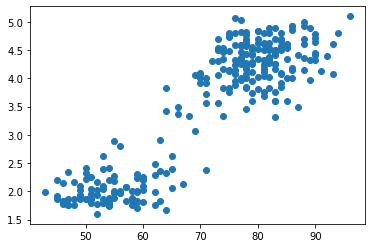

In [2]:
ff= sm.datasets.get_rdataset('faithful').data
print(ff.head())
plt.scatter(ff['waiting'], ff['eruptions'])

## Part A: Fit Models

Run 5 different 2-D Gaussian Mixture Models on the given data with $k=2, 4, 6, 8, 10$ components.  You may use any form of intialization, but I recommend randomness for ease of use/repetition.

Plot their "elbow plot" of $k$ versus mean-distance-to-centroid.  Does it look like there is a best choice of $k$ from these options?  Does this match your intuition?  Explain.

In [3]:
import random
import scipy.stats as stats

def getStartingGuassian(data):
    return np.cov(data)
def getRandomMean(data):
    wait =list(data['waiting'])
    erupt =list(data['eruptions'])
    eruptRandMean = np.random.choice(erupt)
    #eruptRandMean = np.random.randint(np.min(erupt),np.max(erupt))
    #waitRandMean = np.random.randint(np.min(wait),np.max(wait))
    waitRandMean = np.random.choice(wait)
    return [eruptRandMean,waitRandMean]
def getRandomCovar(data):
    #randCov = np.random.choice(np.cov(data))
    x =list(data['eruptions'])
    y =list(data['waiting'])
    xCov =np.cov(x,y)
    
    covMatrix =np.cov(np.stack((x, y), axis=0))
    
    correlation = covMatrix[0][1]
    covarMax = covMatrix[0][0]
    covarMin = covMatrix[1][1]
    #covar = np.random.randint(covarMin,covarMax) #real random initializations ?
    #covar1 = np.random.randint(covarMin,covarMax)
    #arr = [[covar, correlation],[correlation,covar1]]
    arr = [[covarMax, correlation],[correlation,covarMin]]
    return arr
    #return randCov
def gmm2d_initialization(k,ff):
    #initialization
    #XYgrid = getStartingGuassian(ff) #np.cov
    guassian =[]
    for i in range(k):
        
        
        startMean = getRandomMean(ff)
        #startCovar = getCovar(ff)
        startCovar = getRandomCovar(ff)
        guassian.append([startMean,startCovar])
        #print(startMean)
        #print(startCovar)
    return guassian
#getRandomMean(ff)
getRandomCovar(ff)
#getRandomMean(ff)

[[1.302728332849468, 13.977807846754933],
 [13.977807846754933, 184.82331235077052]]

In [4]:
def addTwoVectors (v1,v2):
    return v1+v2

In [5]:
#create function to run with k=# of components 
#     k=2 2 guassian
#k=10
def gmm(k,ff):

    omega = gmm2d_initialization(k,ff)
    #initialize pi
    #pi= 1/k

    
    #for k
    piMatrix=[]
    data_given_classMatrix = []
    class_given_dataMatrix=[]
    n_classMatrix =[]
    for i in range(k):
        piMatrix.append(1/k)
        #f1 = np.zeros(ff.shape)
        #data_given_classMatrix.append(f1)
    
    firstRun = True
    for _ in range(10): #note I know it is not completely right when i put to higher value if 
        summ1=0
       
        #expectation step ------------------------------------------------------------
        
        for s in range(len(omega)):
            
            #print(stats.multivariate_normal.pdf(x=ff, mean=omega[s][0], cov=omega[s][1]))
            if(firstRun):
                data_given_classMatrix.append(stats.multivariate_normal.pdf(x=ff, mean=omega[s][0], cov=omega[s][1]))
                class_given_data = data_given_classMatrix[s] * piMatrix[s]
                #print(class_given_data)
                class_given_dataMatrix.append(class_given_data)
            else:
               
                data_given_classMatrix[s]=stats.multivariate_normal.pdf(x=ff, mean=omega[s][0], cov=omega[s][1])
                class_given_data = data_given_classMatrix[s] * piMatrix[s]
                #print(class_given_data)
                class_given_dataMatrix[s] =class_given_data
            
            if( s == 0):
                summ1 = class_given_dataMatrix[s]
            else:
                
                summ1= addTwoVectors(summ1,class_given_dataMatrix[s])
            #print(summ1)
        #summ = class_given_dataMatrix[0] +class_given_dataMatrix[1]     
        #print("_______________")
        #print(summ1)
        #print(len(summ1))



        for i in range(len(class_given_dataMatrix)): 
        
            #update class given data matrix
            class_given_dataMatrix[i] = class_given_dataMatrix[i]/summ1
            #print(class_given_dataMatrix[i])
        #maximization step
    
        test =0
        for i in range(len(class_given_dataMatrix)):
            n_class = np.sum(class_given_dataMatrix[i])
            if(firstRun):
                n_classMatrix.append(n_class)
                #print("first run : "+str(n_class))
            else:
                n_classMatrix[i] = n_class
            newPi = n_class/len(ff['eruptions'])
            piMatrix[i] = newPi
            #print(newPi)
            test+= piMatrix[i]
        if(test < 1.0): #double checks/forces probalities to add to 1
            dif= 1.0-test
            #grab ranom class to rare case .000001 percent
            indxRand = random.randint(0,k-1)
            #print(indxRand)
            #print(dif)
            piMatrix[indxRand] = piMatrix[indxRand] + dif #dif has a negligible amount 

        #update mu's 
        for i in range(len(omega)):
            #newMu = (1/n_classMatrix[i]) * np.sum(omega[i][0]*ff.to_numpy())
            #print((1/n_classMatrix[i]))
            #print("_____________")
            eruptMu = (1/n_classMatrix[i])* np.sum(class_given_dataMatrix[i]*ff['eruptions'].values)
            waitMu = (1/n_classMatrix[i])* np.sum(class_given_dataMatrix[i]*ff['waiting'].values)

            newMu = [eruptMu,waitMu]
            omega[i][0] = newMu
            #print(omega[i][0])

        #update covariances
           

            erupt_given_wait = (1/n_classMatrix[i])*np.sum(class_given_dataMatrix[i]*((ff['eruptions'].values-eruptMu)*(ff['waiting'].values-waitMu).T))
            wait_given_erupt = (1/n_classMatrix[i])*np.sum(class_given_dataMatrix[i]*((ff['waiting'].values-waitMu)*(ff['eruptions'].values-eruptMu).T))

            erupt_given_erupt = (1/n_classMatrix[i])*np.sum(class_given_dataMatrix[i]*((ff['eruptions'].values-eruptMu)*(ff['eruptions'].values-eruptMu).T))
            wait_given_wait = (1/n_classMatrix[i])*np.sum(class_given_dataMatrix[i]*((ff['waiting'].values-waitMu)*(ff['waiting'].values-waitMu).T))
            cov1 = np.sum((ff['waiting'].values-waitMu)*(ff['eruptions'].values-eruptMu))/len(ff['eruptions'])
            cov2 = np.sum((ff['eruptions'].values-eruptMu)*(ff['waiting'].values-waitMu))/len(ff['eruptions'])
            #print(erupt_given_wait,wait_given_erupt) #sanity check
            #newCovMatrix = [[var1, cov1],[cov1,var2]]
            newCovMatrix = [[erupt_given_erupt, wait_given_erupt],[erupt_given_wait,wait_given_wait]]
            #newCovMatrix = [[erupt_given_erupt, cov1],[cov2,wait_given_wait]]
            #newCovMatrix = [[wait_given_wait, wait_given_erupt],[erupt_given_wait,erupt_given_erupt]]

            #print(omega[i][1])
            omega[i][1] = newCovMatrix
            
            #print(omega[i][1])
            #print(" ")
        #print("_____________")
        firstRun = False
        
    
    return (omega,piMatrix)
omega, piMatrix = gmm(10,ff)


In [6]:
def dist1(x1, x2): #euclidean dist 
    return np.sqrt(np.sum((x1-x2)**2))

In [7]:
distances_Yaxis = []
kVals_Xaxis=[]
ult_omegaMatrix=[] #should have length 5
ult_piMatrix = [] #should have length 5
for i in range(2,12,2):
    kVals_Xaxis.append(i)
    omega, piMatrix = gmm(i,ff)
    ult_omegaMatrix.append(omega)
    ult_piMatrix.append(piMatrix)
    #for every point 
    avgDist=0
    for i, row in ff.iterrows():
        point =row.values
        guassianIndex = piMatrix.index(np.max(piMatrix))
        mus = omega[guassianIndex][0]
        distForPoint = dist1(point,mus)
        avgDist+= distForPoint
        #print(point)
        #print(guassianIndex)
    #print("__________")
    avgDist= avgDist/ff.shape[0]
    distances_Yaxis.append(avgDist)
    #print(avgDist)
    '''
    guassianIndex = piMatrix.index(np.max(piMatrix))
    mus = omega[guassianIndex][0]
    xErupt = distCentr_one(mus[0],ff['eruptions'])
    xWait = distCentr_one(mus[1],ff['waiting'])

    xErupt_avg = np.sum(np.abs(xErupt))/len(xErupt)
    xWait_avg = np.sum(np.abs(xWait))/len(xWait)

    mid = (xErupt_avg + xWait_avg) /2
    distances_Yaxis.append(mid)'''
    

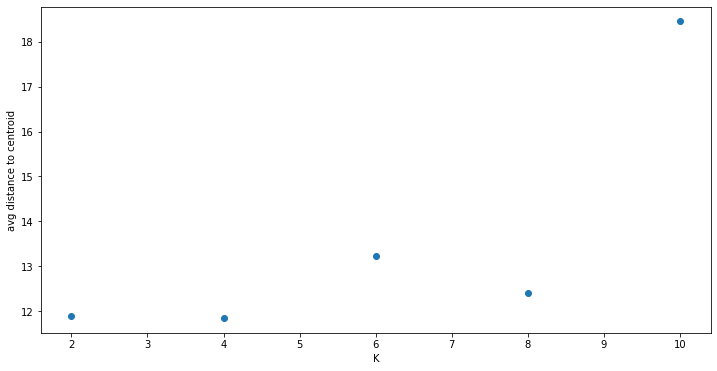

In [8]:
fig, ax= plt.subplots(figsize=(12,6))
plt.scatter(kVals_Xaxis, distances_Yaxis)
ax.set_xlabel('K')
ax.set_ylabel('avg distance to centroid');

I know there is some error in my Gmm model so this graph (and the following) might not be the best indication. Assuming the graph produced is some what accurate, my intuition of 2 guassian having the smallest distance to the "centroid" was incorrect. To compute the distance from point to component I chose the most likely component and computed that one's and the points euclidean distance. From the graph above it seems that 4 guassians is the correct choice. I do have my doubt because my answers fluctuate.

## Part B: Simulate from Models

Because the GMM is a *generative* model, we could use our results from part $A$ to not only score models based on their mean-distance-to-centroid (or other statistical measures like AIC, BIC), we could simulate points from the models and visually ascertain whether or not they appear similar to the original distribution.

For each of the 5 GMM models in part a), simulate 272 points from your estimated density function (recall: this is a two-part simulation of choosing a component **then** drawing from the normal of appropriate mean/covariance).

Create a figure with 2 columns and 3 rows holding all 6 data sets: the 5 simulated ones and the original data shown above.  Label each plot appropriately.  

Text(0.5, 1.0, 'OG')

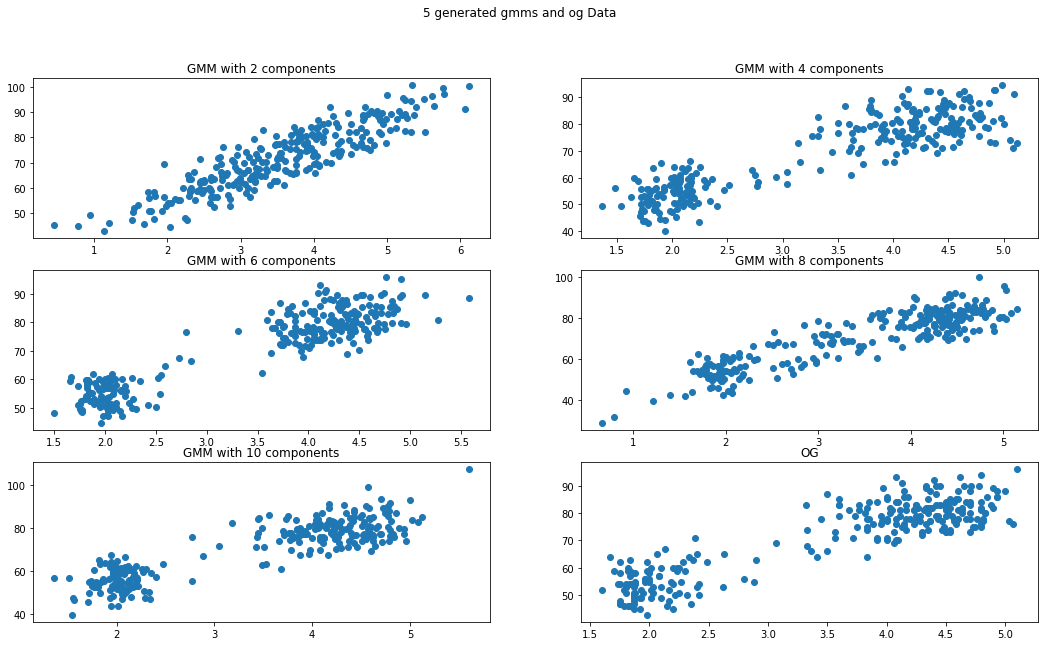

In [9]:
def gmm_samples(num_samples, omega, piMatrix):
    #samples = []
    samplesX = []
    samplesY = []
    for k in range(num_samples):
        # Sample Delta ~ Bernoulli(pi)
        indexChoices = [i for i in range(len(omega))]
        #print(indexChoices)
        #print(piMatrix)
        delta = np.random.choice(indexChoices, p=piMatrix) 
        #print(delta)
        #samples.append(stats.multivariate_normal.pdf(k,omega[delta][0], omega[delta][1],1))
        newPt =np.random.multivariate_normal(omega[delta][0], omega[delta][1],1)
        #print(newPt[0][0])
        samplesX.append(newPt[0][0])
        samplesY.append(newPt[0][1])
        
    return (samplesX,samplesY)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18,10))

fig.suptitle('5 generated gmms and og Data')

kCount =0
for i in range(0,3):
    
    for j in range(0,2):
        if((i!=2) or (j!=1)):
            kVal = kVals_Xaxis[kCount]
            name = "GMM with " +str(kVal) +" components"
            x,y = gmm_samples(272, ult_omegaMatrix[kCount], ult_piMatrix[kCount])
            axes[i][j].scatter(x, y)
            axes[i][j].set_title(name)
            kCount+=1
axes[2][1].scatter(ff['eruptions'], ff['waiting'])
axes[2][1].set_title("OG")
 

## Part C: Discussion

Which plot or plots look closest to the original data?  Depending on your interpretations of the elbow plot versus the simulated data, you may have decided that we wanted a different value of $k$ for the best model to *simulate* from rather than the best model to *cluster* or classify upon.  Do you think that this is normally the case?  Why or why not?  What properties of a data set would make one task easier or harder with more or less $k$?

The plots that look closest are GMM with 4 and 6 components. I did choose a different value k based on the simulations. I think this is normally the case, a data set that has variables thare are highly related. The more k components would make simulating points more precise because there is wider range for the points to fall into. As for clustering, to many k woulds make it worse after hitting the "elbow", essentially when you increase k after this point, we end up splitting a one of the clusters that really did not need to be split.



# Problem 3 (Practice:k-means and clustering similarities; 20 pts)

Our goal in this problem is to get a better understanding of two important facets of clustering: ways to compare between clusters and how much initialization might matter for e.g. kmeans.

The code below loads up a well known dataset extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).  The columns are:

- mpg:	Miles/(US) gallon
- cyl:	Number of cylinders
- disp:	Displacement (cu.in.)
-  hp:	Gross horsepower
- drat:	Rear axle ratio
- wt:	Weight (1000 lbs)
- qsec:	1/4 mile time
- vs:	Engine (0 = V-shaped, 1 = straight)
- am:	Transmission (0 = automatic, 1 = manual)
- gear:	Number of forward gears
- carb:	Number of carburetors

We're going to attempt to cluster this data using **4** of these columns: mpg, disp, wt, and qsec.

                mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Mazda RX4      21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710     22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1


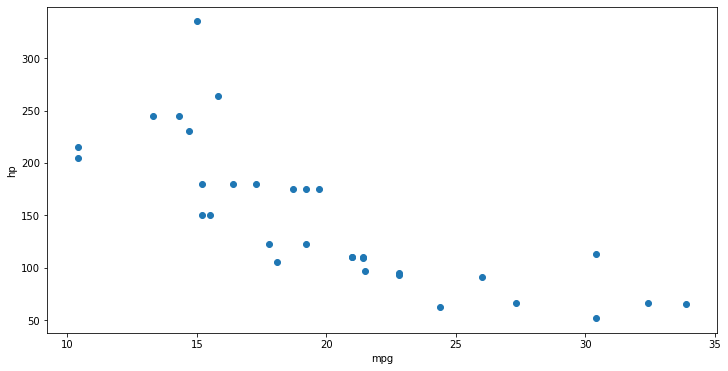

In [10]:
cars= sm.datasets.get_rdataset('mtcars').data
print(cars.head(3))

#example plot of mpg x hp
fig, ax= plt.subplots(figsize=(12,6))
plt.scatter(cars['mpg'], cars['hp'])
ax.set_xlabel('mpg')
ax.set_ylabel('hp');

## Part A) K-means and Normalization: Intuition

The first question we should ask is whether or not to normalize our data.  Use the pandas methods `describe` on the data frame.  What do you expect to happen if we cluster without normalizing the data?  Why?



In [11]:
cars.describe() #mpg, disp, wt, and qsec.

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


We have to account for different units between columns, some might be less or more important. The reason for normalizing the data is to prevent treating differences in each column the same. For instance if we had took lets say mpg and disp, displacement has a wider range and so it would make a difference in mpg seem less significant. I would expect displacement to hold the most influence of the four columns of data. 

## Part B) K-means and Normalization: First Clusters 

Now do initial, unnormalized clustering for $k=3$.  Save the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

In [12]:
#before we start
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2)) #2-d euclidean distance
columns =['mpg','disp','wt','qsec']
cars_new=cars.loc[:,columns].copy()
X= cars_new.to_numpy()
#cars_new.head(50)
#print(dist(np.array([2,3,4,2]),np.array([1,-2,1,3]))) -answer should be 6 
#print(dist(np.array([4,-2,1,3]),np.array([4,-2,1,3])))

In [13]:
def visualize(X,clusters,centroids):
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=clusters)
    plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='red', marker='+')
    plt.xlabel("mpg")
    plt.ylabel("disp")
    plt.show()

Initial Visualization


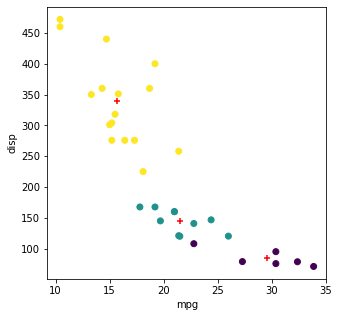

Centroids Locations
[[ 29.53333333  84.6          1.903       18.71666667]
 [ 21.48       144.91         2.887       18.439     ]
 [ 15.68125    339.15         3.9165      17.154375  ]]
Resulting Visualization


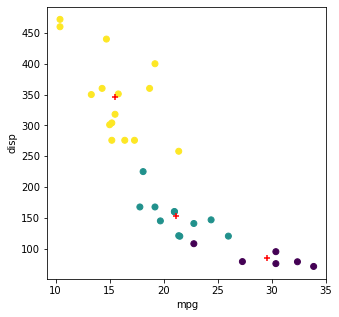

Centroids Locations
[[ 29.53333333  84.6          1.903       18.71666667]
 [ 21.17272727 152.19090909   2.93909091  18.60090909]
 [ 15.52       346.76         3.94693333  16.95      ]]


In [14]:
def kMean(k,cars,debug,vis):
    #Initialization
    ############################################################
    #k = 3
    X= cars.to_numpy() #make it ndarray
    
    #pick randomly k points to be centroids Im lazy
    centroidIndex = np.random.choice(len(cars), k, replace=False)#grab a random non repeating index

    #grab the centroids
    centroids = np.array(cars.iloc[centroidIndex,:])
    
    if(debug):
        #print(X[0]) #sanity check
        #print(centroidIndex)
        print(centroids)
        
    dists = [-1]*k
    clusters = np.array([-1]*len(X))
    ############################################################
    firstVis =True
    clustersStoppedChanging =True
    ultDist =1 #distance btw clusters
    while((ultDist>0.0) or clustersStoppedChanging):
    #for _ in range(1000): #100 steps is fine; or a tolerance/change check.
        #update classifications
        
        for j in range(len(X)):
            dists = [dist(X[j], cent) for cent in centroids]
            
            assignment = dists.index(min(dists))
            
            #finish later-------------------------------------------------------if want conditional
            for l in range(len(centroids)):
                
                if(clusters[l] != assignment):
                #    print("hi")
                    clustersStoppedChanging = False
            clusters[j] = assignment
            
        #print(clusters)
        
        #-----------------------------------note just make copy of centroids here
        #update centroids
        prevCentroids = centroids.copy()
        for j in range(k):
            #prevCentroids[j] = centroids[j]
            centroids[j]=[np.sum(X[clusters==j,0])/len(X[clusters==j,0]),np.sum(X[clusters==j,1])/len(X[clusters==j,1]),np.sum(X[clusters==j,2])/len(X[clusters==j,2]),np.sum(X[clusters==j,3])/len(X[clusters==j,3])]
        if(debug):
            print(prevCentroids)
            print("++++++")
            print(centroids)
            
        ultDist = dist(prevCentroids,centroids)
        
        if((firstVis) and (vis)):
            print("Initial Visualization")
            visualize(X,clusters,centroids)
            print("Centroids Locations")
            print(centroids)
            firstVis =False
        
        #print(clustersStoppedChanging)
        #if(clustersStoppedChanging):
        #    print("Wooo")
        #    #break
        
    #visualization
    if(vis):
        print("Resulting Visualization")
        visualize(X,clusters,centroids)
        print("Centroids Locations")
        print(centroids)
    return clusters,centroids
clusters_notNormalized,c_un = kMean(3,cars_new,False,True)

## Part C) K-means and Normalization: An Alternative

Normalize the 4 columns being used by replacing each with their Box-Muller transformation (for each column, subtract the mean of that column then divide by its standard deviation).  Repeat your clustering for $k=3$, again saving the final cluster for each point.  Plot the final clusters on an `mpg` versus `disp` axis.

Then answer: do the clusterings look different?

In [15]:
cars_normalized = cars_new.copy()
for i in range(len(columns)):
    
    normCol = cars_new.loc[:,columns[i]].copy()
    mean = np.mean(X[:,i])
    std =np.sqrt(np.var(X[:,i],ddof=1))
    
    for j in range(len(normCol)):
        normCol[j] = (normCol[j] - mean)/std
    cars_normalized[columns[i]] = normCol
    
    #print(normCol)

cars_normalized.head()

,mpg,disp,wt,qsec
Mazda RX4,0.150885,-0.570620,-0.610400,-0.777165
Mazda RX4 Wag,0.150885,-0.570620,-0.349785,-0.463781
Datsun 710,0.449543,-0.990182,-0.917005,0.426007
Hornet 4 Drive,0.217253,0.220094,-0.002300,0.890487
Hornet Sportabout,-0.230735,1.043081,0.227654,-0.463781


Initial Visualization


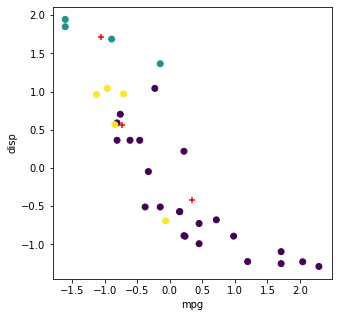

Centroids Locations
[[ 0.34638358 -0.4218436  -0.34787454  0.35325688]
 [-1.06448985  1.71276716  1.78725198 -0.15739168]
 [-0.74177261  0.57026682  0.17042131 -1.49906832]]
Resulting Visualization


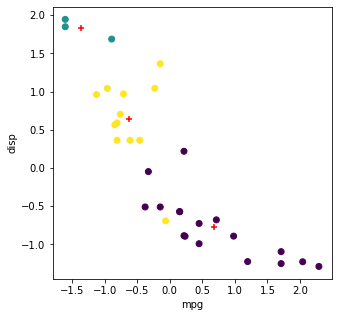

Centroids Locations
[[ 0.68573752 -0.77247483 -0.63126074  0.57348179]
 [-1.37006186  1.82841574  2.16914561 -0.06085812]
 [-0.62894602  0.63723542  0.35199964 -0.79721801]]


In [16]:
clusters_Normalized,c_n =  kMean(3,cars_normalized,False,True)



## Part D) The Rand Statistic
We need to formalize wheter or not normalizing actually mattered, which requires a measurement of whether or not two clusterings are actually different from one another! 

To do this we are going to use the Rand statistic, with documentation here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

Use the `adjusted_rand_score` metric loaded below and compare the two clusterings from parts A and B.

In [17]:
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score([1, 0, 1], [0,1,0])) #example that's actually the same assignments!
print(adjusted_rand_score([1, 0, 1], [0,0,1])) #example: Rand score is negative if very different

#How do your clusters compare?
print(adjusted_rand_score(clusters_Normalized, clusters_notNormalized)) 

1.0
-0.49999999999999994
0.3881264456437934


The two clustering seems to share resemblance as it hovers in btw $\approx$ (.6, .7)



## Part E) ...and then repeat.

Of course, it turns out that kmeans might *also* depend on initializations, and we want to make sure that random initializations aren't affecting your clusters in parts A and B.  One way to ensure that we don't get "unlucky" results is to repeat our experiment with many different initializations, and then choose the "best" one.  A Rand statistic gives us a mechanism to do this!


### E. i) 
Run k-means 100 times for $k=3$ on the *unnormalized* data, each with a different random initialization.

In other words, perform the following operations 100 times:

    1) Initialize k-means by randomly selecting `k' of your data points
    2) Run k-means until convergence
    3) Save the final cluster for each point
    
    
A few rows of your final k=3 output might be:

`dfk3.head(3)'

| Point # | Run1 | Run2 | Run3 | ... | Run 100 |
| --- | --- |
| 1 | 1 | 2 | 1| ... | 1 |
| 2 | 3 | 1 | 3 | ... | 3|
| 3 | 1 | 2 | 1 | ... | 1|

(so in this example, points 1 & 3 were always in the same cluster, but point 2 was elsewhere)



In [18]:
dfk3_unorm_list =[]
for i in range(100):
    #print(i)
    clust,cI = kMean(3,cars_new,False,False)
    
    dfk3_unorm_list.append(list(clust))
    #print(clust)

dfk3_unorm = pd.DataFrame(dfk3_unorm_list)
dfk3_unorm = dfk3_unorm.T

In [19]:
dfk3_unorm.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,0,0,2,0,1,1,2,...,0,0,0,0,1,0,2,1,1,2
1,1,1,1,0,0,2,0,1,1,2,...,0,0,0,0,1,0,2,1,1,2
2,1,1,0,2,1,2,0,1,1,2,...,1,0,1,0,0,1,2,2,1,0
3,2,0,2,1,2,0,2,2,2,1,...,2,2,2,1,2,2,1,0,2,1
4,0,2,2,1,2,1,1,2,2,0,...,2,2,2,2,2,2,1,0,2,1


### E. ii) 
Run k-means 100 times for $k=3$ on the *normalized* data, each with a different random initialization.  Save the results in another data frame.

In [20]:
dfk3_norm_list =[]
dfk3_norm_list_centroids=[]
for i in range(100):
    clust,centroids = kMean(3,cars_normalized,False,False)
    dfk3_norm_list.append(list(clust))
    dfk3_norm_list_centroids.append(list(centroids))
dfk3_norm = pd.DataFrame(dfk3_norm_list)
dfk3_norm = dfk3_norm.T
dfk3_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,2,2,1,0,1,0,2,1,2,...,0,2,0,2,0,2,0,1,0,0
1,1,2,2,1,0,1,0,2,1,2,...,0,2,0,2,0,2,0,1,0,0
2,2,0,2,1,0,2,0,2,1,0,...,0,2,0,1,0,1,1,1,0,0
3,1,1,2,0,0,1,0,1,1,2,...,1,2,0,1,0,1,0,1,2,2
4,1,2,0,0,2,1,2,0,0,2,...,2,0,2,0,2,0,0,2,1,1


### E. iii) 

For the 100 runs on the unnormalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).


In [21]:
simMatrix_unorm_list = []
runSummedScore_unorm=[]
for i in range(100):
    k1 = dfk3_unorm[i].values
    #print(k1)
    k1simArr = []
    count=0
    for j in range(100):
        k2 = dfk3_unorm[j].values
        ars= adjusted_rand_score(k1, k2)
        k1simArr.append(ars)
        count+=ars
        #print(ars)
    runSummedScore_unorm.append(count)
    simMatrix_unorm_list.append(k1simArr)
simMatrix_unorm= np.array(simMatrix_unorm_list)
unormIndex = runSummedScore_unorm.index(np.max(runSummedScore_unorm))
print("Most indicative run has index of: " +str(unormIndex))

Most indicative run has index of: 7



### E. iv) 

For the 100 runs on the normalized data, create a similarity matrix of all-pairwise Rand scores.  Select the run with the highest overall summed Rand scores as the "most indicative run" (note: this is actually the clustroid of the clusters, if we consider Rand similarity an approximate distance!).



In [22]:
simMatrix_norm_list = []
runSummedScore_norm=[]
for i in range(100):
    k1 = dfk3_norm[i].values
    #print(k1)
    k1simArr = []
    count=0
    for j in range(100):
        k2 = dfk3_norm[j].values
        ars= adjusted_rand_score(k1, k2)
        k1simArr.append(ars)
        count+=ars
        #print(ars)
    runSummedScore_norm.append(count)
    simMatrix_norm_list.append(k1simArr)
simMatrix_norm= np.array(simMatrix_norm_list)
finalIndex=runSummedScore_norm.index(np.max(runSummedScore_norm))
print("Most indicative run has index of: " +str(finalIndex))

Most indicative run has index of: 8


### E. v)  

Compare the two runs selected by parts E.iii and E.iv.  Are they identical, or can we definititely say that normalization effects the clustering in this problem?


In [23]:
unorm1=dfk3_unorm_list[finalIndex]
norm1 = dfk3_norm_list[finalIndex]
print("E.iii : ")
print(unorm1)
print("E.iv : ")
print(norm1)

E.iii : 
[1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 1]
E.iv : 
[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1]


They have some similarity but are not the same. Hence, we can say that normalizatin effects the clustering in this problem.

## Part F) Visualize
Plot the best $k=3$ cluster resulting from clustering the *normalized* data, but use the original data scale in the plot.  Use mpg versus displacement for the axes.  Color the clusters, and label each point with the car name.

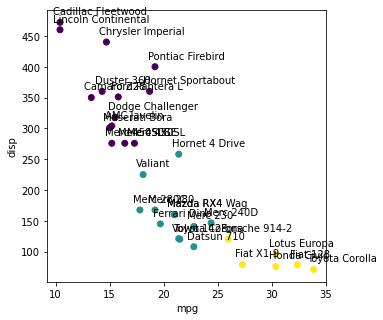

In [34]:
#visualize(cars_normalized.toNumpy(),clusters,dfk3_norm_list_centroids[finalIndex])
Z = cars_new.to_numpy()
labels =cars.index.values
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in Z], [x[1] for x in Z], c=dfk3_norm_list[finalIndex])
#plt.scatter([x[0] for x in dfk3_norm_list_centroids[finalIndex]], [x[1] for x in dfk3_norm_list_centroids[finalIndex]], c='red', marker='+')
plt.xlabel("mpg")
plt.ylabel("disp")
for x_pos, y_pos, label in zip([x[0] for x in Z],  [x[1] for x in Z], labels):
    ax.annotate(label,xy=(x_pos, y_pos),xytext=(-7, 8),textcoords='offset points',ha='left')       
plt.show()

Did not have time to making it look pretty so I'm printing it again with out labeled points.

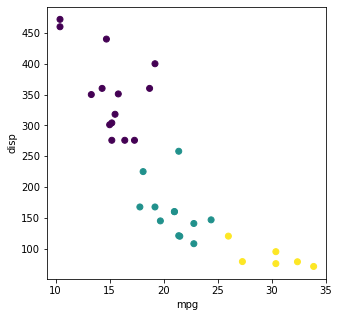

In [35]:
Z = cars_new.to_numpy()
labels =cars.index.values
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in Z], [x[1] for x in Z], c=dfk3_norm_list[finalIndex])
#plt.scatter([x[0] for x in dfk3_norm_list_centroids[finalIndex]], [x[1] for x in dfk3_norm_list_centroids[finalIndex]], c='red', marker='+')
plt.xlabel("mpg")
plt.ylabel("disp")
plt.show()